# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [59]:
# import libraries here
import pandas as pd
import numpy as np
import requests
import re
import matplotlib.pyplot as plt
%matplotlib inline 

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [5]:
temp = pd.read_csv('Temp_States.csv')
temp_df = pd.DataFrame(temp)

#### Print `temp`

In [6]:
temp_df

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [7]:
temp_df.dtypes
## We have strings as object and temperature as a float 

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [10]:
temp_df[temp_df['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [13]:
temp_df[temp_df['State'] == 'New York'].mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [14]:
temp_df[temp_df['Temperature']>15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [16]:
temp_df['City'][temp_df['Temperature']>15]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [22]:
temp_df['City'][(temp_df['Temperature']>15) & (temp_df['Temperature']<20)]

0         NYC
3    Hartford
6      Newark
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [54]:
temp_state = temp_df[['State', 'Temperature']].groupby('State').mean()
temp_state['StandardD'] = temp_df[['State', 'Temperature']].groupby('State').std()
temp_state

,Temperature,StandardD
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [58]:
employee = pd.read_csv('employee.csv')
employee_df = pd.DataFrame(employee)
employee_df

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [57]:
employee_df.dtypes
##As in previous challenge, strings are marked as objects, and years and salary as integers 

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset (Years and Salary, 20 buckets). In few words describe these histograms?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5fe2ac910>,
      dtype=object)

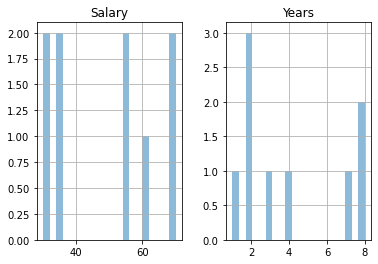

In [61]:
#employee_df_meh = employee_df[['Years', 'Salary']].('State').hist(bins=20, alpha=0.5)
employee_df.hist(bins=20, alpha=0.5)


#### What's the average salary in this company?

In [62]:
employee_df['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [63]:
employee_df['Salary'].max()

70

#### What's the lowest salary?

In [68]:
# your answer here
employee_df['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [69]:
employee_df[employee_df['Salary']==30]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [74]:
employee_df[employee_df['Name']=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [75]:
# your answer here
employee_df['Salary'][employee_df['Name']=='David']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [76]:
employee_df[employee_df['Title']=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [77]:
employee_df.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [83]:
print(employee_df.iloc[:3])


    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and the salary above 55?

In [84]:
employee_df[(employee_df['Title']=='associate') & (employee_df['Salary']>50)]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [88]:
employis = employee_df[['Department', 'Years']].groupby('Department').mean()
employis

,Years
Department,
HR,4.666667
IT,4.500000
Sales,2.500000


####  What is the average Salary per title?

In [89]:
employee_df[['Title', 'Salary']].groupby('Title').mean()

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

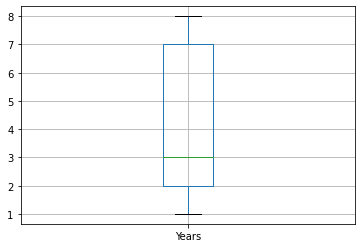

In [94]:
employee_df.boxplot(column=['Years'])

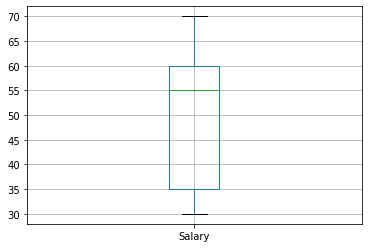

In [93]:
employee_df.boxplot(column=['Salary'])

In [95]:
employee_df.Salary.quantile([0.25])


0.25    35.0
Name: Salary, dtype: float64

In [96]:
employee_df.Salary.quantile([0.75])


0.75    60.0
Name: Salary, dtype: float64

#### Is the mean salary per gender different?

In [97]:
employee_df[['Gender', 'Salary']].groupby('Gender').mean()
##Yes it is 

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [103]:
employee_df[['Department', 'Salary', 'Years']].groupby('Department').mean()
#employeedf[['Department', 'Salary']].groupby('Department')

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


In [106]:
employee_df[['Department', 'Salary', 'Years']].groupby('Department').min()


,Salary,Years
Department,,
HR,30,2
IT,30,1
Sales,55,2


In [107]:
employee_df[['Department', 'Salary', 'Years']].groupby('Department').max()


,Salary,Years
Department,,
HR,70,8
IT,70,8
Sales,55,3


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here